In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv",encoding="utf-8")
df.head()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


In [4]:
df["label"].unique()

array(['2', '1', '0', '20', '11', '-', 'o', '--'], dtype=object)

In [5]:
df["label"].value_counts()

label
1     2378
0     2377
2     1236
-        5
20       1
11       1
o        1
--       1
Name: count, dtype: int64

In [7]:
# Filtering out unwanted labels
unwanted_labels = re.compile(r'^(-|20|11|o|--)$')
df = df[~df['label'].str.match(unwanted_labels)]

In [8]:
df["label"].unique()

array(['2', '1', '0'], dtype=object)

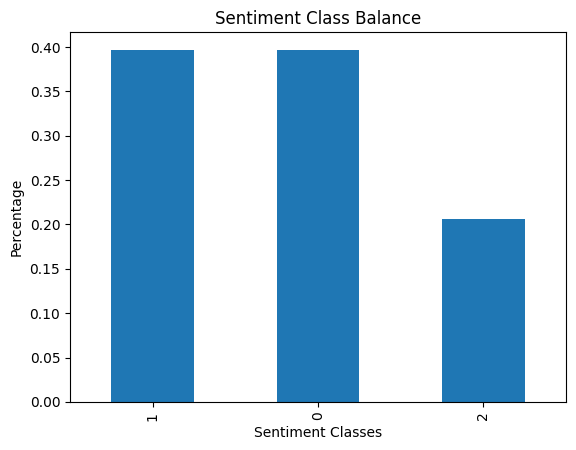

In [13]:
# Visualizing Class Balance
df["label"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Sentiment Classes")
plt.ylabel("Percentage")
plt.title("Sentiment Class Balance");


In [14]:
X_train, y_train = df["text"],df["label"]

## Text Preprocessing

In [17]:
import nltk

In [55]:
text = X_train[5]
text

'मध्यभोटेकोशिको शेयर ,, कर्मचारी संञ्चयकोष का संञ्चयकर्ताहरुको नाममा परेको शेयर कहिले मेरो शेयरमा देखाउँछ होला ????? प्रष्ट पारिदिनु होला ,'

In [70]:
def clean_text(text):    
    # Remove Links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove emojis and non-alphanumeric characters, Keeping nepali and English
    text = re.sub(r'[^\w\s\u0900-\u097F\u0041-\u005A\u0061-\u007A]', '', text)

    return text.strip()


In [72]:
X_train = X_train.astype(str).apply(clean_text)
X_train.head()

0    बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...
1    1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2    होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...
3    खैँ MBJC प्रति कित्तामा रू10ले बढेर आज रू1100 ...
4                                           राम्रो भयो
Name: text, dtype: object

In [73]:
X_train[0]

'बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्काल प्रोफिट बूकिङ आउने सम्भावना रहेन  भोलि अर्को ट्रेन्ड समात्न सक्ने अबस्था पनि दरो छ'

### Removing Stopwords

In [57]:
# Removing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords',download_dir=r"D:\Internship\Nepali-Sentiment-Classification\NepaliSentiment")

[nltk_data] Downloading package stopwords to D:\Internship\Nepali-
[nltk_data]     Sentiment-Classification\NepaliSentiment...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
with open('nepali', 'r', encoding='utf-8-sig') as f:
    nepali_stopwords = [line.strip() for line in f]

In [60]:
nepali_stopwords[:5]

['छ', 'र', 'पनि', 'छन्', 'लागि']

In [61]:
english_stopwords = nltk.corpus.stopwords.words('english')
combined_stopwords = nepali_stopwords + english_stopwords

In [79]:
# Remove stopwords
def remove_stopwords(text,stopword_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopword_list]
    return ' '.join(filtered_words)

X_train = X_train.apply(remove_stopwords,args=(combined_stopwords,))
# text = remove_stopwords(text, combined_stopwords)
# text

In [84]:
X_train[500]

'ऋषि धमला अरुलाइ बोल्न नदिने कस्तो कबाडी ऋषि'

### Tokenization

In [87]:
from nepalitokenizers import WordPiece

def tokenize(text):
    
    tokenizer_wp = WordPiece()
    tokens = tokenizer_wp.encode(text)
    return tokens.tokens

X_train = X_train.apply(tokenize)
# print(tokens.ids)
# print(tokens.tokens)

# print(tokenizer_wp.decode(tokens.ids))

In [ ]:
# from transformers import AutoTokenizer

# # Load a multilingual model tokenizer (mBERT or XLM-R)
# tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

# tokens = tokenizer.tokenize(text)

# print(tokens)

['मध्य', '##भ', '##ोट', '##ेको', '##श', '##िक', '##ो', 'श', '##ेय', '##र', 'कर', '##्म', '##चार', '##ी', 'सं', '##ञ', '##्', '##च', '##यक', '##ो', '##ष', 'सं', '##ञ', '##्', '##च', '##यक', '##र', '##्ता', '##हर', '##ुक', '##ो', 'नाम', '##मा', 'पर', '##ेको', 'श', '##ेय', '##र', 'क', '##हिले', 'श', '##ेय', '##र', '##मा', 'देखा', '##उ', '##ँ', '##छ', 'हो', '##ला', 'प', '##्र', '##ष्ट', 'प', '##ार', '##ि', '##द', '##िन', '##ु', 'हो', '##ला']


In [88]:
X_train.head()

0    [[CLS], बजार, जसरी, ट्रेन्ड, चेन, ##्, ##ज, गर...
1    [[CLS], 100, ##0, अंकले, घटेको, नेप्से, 20, ##...
2    [[CLS], होइन, सानिमा, बैंक, bo, ##nu, ##s, घो,...
3    [[CLS], खै, ##ँ, m, ##b, ##j, ##c, कित्ता, ##म...
4                                  [[CLS], भयो, [SEP]]
Name: text, dtype: object

### TF-IDF Vectorization

In [89]:
X_train_cleaned = X_train.apply(lambda tokens: [token for token in tokens if token not in ['[CLS]', '[SEP]']])

In [90]:
X_train_cleaned.head()

0    [बजार, जसरी, ट्रेन्ड, चेन, ##्, ##ज, गर्यो, हे...
1    [100, ##0, अंकले, घटेको, नेप्से, 20, ##0, अंकल...
2    [होइन, सानिमा, बैंक, bo, ##nu, ##s, घो, ##स, #...
3    [खै, ##ँ, m, ##b, ##j, ##c, कित्ता, ##मा, रू, ...
4                                                [भयो]
Name: text, dtype: object

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokenized sentences back to strings
X_train_joined = [' '.join(tokens) for tokens in X_train_cleaned]
vectorizer = TfidfVectorizer(max_features=2500)
vectorized = vectorizer.fit(X_train_joined)
X_train_tfidf = vectorized.transform(X_train_joined)

print(X_train_tfidf.shape) 

(5991, 1432)


## Model Training

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_train_tfidf)

print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.7282590552495409


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Pipeline for test data

In [124]:
def clean_text(text):    
    # Remove Links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove emojis and non-alphanumeric characters, Keeping nepali and English
    text = re.sub(r'[^\w\s\u0900-\u097F\u0041-\u005A\u0061-\u007A]', '', text)

    return text.strip()

def remove_stopwords(text,stopword_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopword_list]
    return ' '.join(filtered_words)

def tokenize(text):
    tokenizer_wp = WordPiece()
    tokens = tokenizer_wp.encode(text)
    return tokens.tokens

df_test = pd.read_csv("test.csv",encoding="utf-8")

unwanted_labels = re.compile(r'^(-|20|11|o|--)$')
df_test = df_test[~df_test['label'].str.match(unwanted_labels)]

#Split
X_test,y_test = df_test["text"], df_test["label"]

X_test = X_test.astype(str).apply(clean_text)

X_test = X_test.apply(remove_stopwords,args=(combined_stopwords,))

X_test = X_test.apply(tokenize)

X_test_cleaned = X_test.apply(lambda tokens: [token for token in tokens if token not in ['[CLS]', '[SEP]']])

# Join tokenized sentences back to strings
X_test_joined = [' '.join(tokens) for tokens in X_test_cleaned]
X_test_tfidf = vectorized.transform(X_test_joined)

In [125]:
print(X_test_tfidf.shape) 

(1994, 1432)


In [127]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5170511534603811


### Applying Regularization

In [128]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train_tfidf, y_train)

y_pred_train = model.predict(X_train_tfidf)

print("Accuracy:", accuracy_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_test))

Accuracy: 0.7282590552495409
Accuracy: 0.5170511534603811


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Cross Validation

In [129]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", scores)

print("Mean cross-validation score:", scores.mean())

d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Inte

Cross-validation scores: [0.48040033 0.57846411 0.66777963 0.6293823  0.56176962]
Mean cross-validation score: 0.5835591986087459


d:\Internship\Nepali-Sentiment-Classification\NepaliSentiment\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## BERT Models